In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [ ]:
cbf_data = nib.load('/Users/xinzhang/Downloads/mrc_asl_cic/data/sub01/ing/s1/analysis/2D_REST/native_space/perfusion_calib.nii.gz').get_fdata()
nib.viewers.OrthoSlicer3D(cbf_data).show()

In [17]:
def visualise_byprotocol(subno, protocol, space='native', hist=True):

    colors = ['tab:blue','tab:orange','tab:red','tab:green']
    if isinstance(subno,int): subno = [subno]
    for sub in subno:

        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/sub{:02d}'.format(sub)

        if protocol=='GE-3D':
            figure_img = plt.figure(figsize=[12,3],dpi=100) 
            figure_hist = plt.figure(figsize=[6,3],dpi=100)
            if hist: ax_hist = figure_hist.add_subplot()
            j=0
            for session in ['s1','s2']:
                for state in ['REST','TASK']:
                    ax_img = figure_img.add_subplot(1,4,j+1)
                    cbf = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed.nii.gz').get_fdata()
                    mask = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed_mask.nii.gz').get_fdata()
                    ax_img.imshow(np.flipud(cbf[:,:,round(cbf.shape[2]/2)].T),cmap='Greys_r')
                    ax_img.xaxis.set_visible(False)
                    ax_img.yaxis.set_visible(False)
                    ax_img.set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state+' '+space+' space')
                    if hist: ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,histtype='step',label=session+' '+state,color=colors[j])
                    j+=1
            if hist: ax_hist.legend()
            if hist: ax_hist.grid(alpha=0.5)
            if hist: ax_hist.set_xlabel('CBF (ml/100g/min)')
            if hist: ax_hist.set_ylabel('Number of voxels')
            if hist: ax_hist.set_title('Histogram of sub{:02d}'.format(sub)+' '+protocol+' '+space+' space')

        else:
            if protocol=='GE-eASL':
                scanner='ge'; type='eASL'
            elif protocol=='Ing-2D':
                scanner='ing'; type='2D'
            elif protocol=='Ing-3D':
                scanner='ing'; type='3D'
            else:
                ValueError('Protocol name does not exist.')
            struct_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/T1_biascorr_brain_mask.nii.gz').get_fdata()
            std_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/MNI152_T1_2mm_brain_mask_dil1.nii.gz').get_fdata()
            figure_img = plt.figure(figsize=[24,3],dpi=100) 
            figure_hist = plt.figure(figsize=[12,3],dpi=100)
            j=0
            for pvc in ['nopvc','pvc']:
                if hist: ax_hist = figure_hist.add_subplot(1,2,j//4+1)
                for session in ['s1','s2']:
                    for state in ['REST','TASK']:
                        ax_img = figure_img.add_subplot(1,8,j+1)
                        if pvc=='nopvc':
                            cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
                        if pvc=='pvc':
                            cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
                        if space=='native':
                            mask = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/mask.nii.gz').get_fdata()
                        elif space=='struct':
                            mask = struct_mask
                        elif space=='std':
                            mask = std_mask
                        ax_img.imshow(np.flipud(cbf[:,:,round(cbf.shape[2]/2)].T),cmap='Greys_r')
                        ax_img.xaxis.set_visible(False)
                        ax_img.yaxis.set_visible(False)
                        ax_img.set_title('sub{:02d}'.format(sub)+' '+protocol+' '+pvc+'\n'+session+' '+state+' '+space+' space')
                        if hist: ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200),histtype='step',label=session+' '+state,color=colors[j%4])
                        j+=1
                if hist: ax_hist.legend()
                if hist: ax_hist.grid(alpha=0.5)
                if hist: ax_hist.set_xlim([0,200])
                if hist: ax_hist.set_xlabel('CBF (ml/100g/min)')
                if hist: ax_hist.set_ylabel('Number of voxels')
                if hist: ax_hist.set_title('Histogram of sub{:02d}'.format(sub)+' '+protocol+' '+pvc+' '+space+' space')
                
    return None

In [ ]:
visualise_byprotocol(subno=[1,2,3,4,5,6,7,8,9,10],protocol='Ing-3D',space='native',hist=True)

In [26]:
def visualise_byprotocol(subno, protocol, space='native', hist=True, refon=False):

    colors = ['tab:blue','tab:orange','tab:red','tab:green']
    if isinstance(subno,int): subno = [subno]
    for sub in subno:

        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/sub{:02d}'.format(sub)

        if protocol=='GE-3D':
            if refon: figure_ref = plt.figure(figsize=[12,3],dpi=100)
            figure_img = plt.figure(figsize=[12,3],dpi=100) 
            figure_hist = plt.figure(figsize=[6,3],dpi=100)
            if hist: ax_hist = figure_hist.add_subplot()
            j=0
            for session in ['s1','s2']:
                for state in ['REST','TASK']:
                    j+=1
                    cbf = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed.nii.gz').get_fdata()
                    mask = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed_mask.nii.gz').get_fdata()
                    ax_img = figure_img.add_subplot(1,4,j)
                    ax_img.imshow(np.flipud(cbf[:,:,round(cbf.shape[2]/2)].T),cmap='Greys_r')
                    ax_img.xaxis.set_visible(False)
                    ax_img.yaxis.set_visible(False)
                    ax_img.set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state+' '+space+' space')
                    if hist: ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,histtype='step',label=session+' '+state,color=colors[j-1])
                    if refon:
                        cbf_ref = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/AVG_CBF.nii.gz').get_fdata()
                        ax_ref = figure_ref.add_subplot(1,4,j)
                        ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap='Greys_r')
                        ax_ref.xaxis.set_visible(False)
                        ax_ref.yaxis.set_visible(False)
                        ax_ref.set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state+' ref-image')
            if hist: 
                ax_hist.legend()
                ax_hist.grid(alpha=0.5)
                ax_hist.set_xlabel('CBF (ml/100g/min)')
                ax_hist.set_ylabel('Number of voxels')
                ax_hist.set_title('Histogram of sub{:02d}'.format(sub)+' '+protocol+' '+space+' space')

        else:
            filename_ref = {'GE-eASLRESTnative':'/nifti/NOT_DIAGNOSTIC_(CBF)_eASL_7_delays_real.nii.gz',
                            'GE-eASLTASKnative':'/nifti/NOT_DIAGNOSTIC_(CBF)_eASL_7_delays_ACT_real.nii.gz',
                            'GE-eASLRESTstruct':'/analysis/T1.anat/T1_biascorr_brain.nii.gz',
                            'GE-eASLTASKstruct':'/analysis/T1.anat/T1_biascorr_brain.nii.gz',
                            'GE-eASLRESTstd':'/analysis/T1.anat/T1_to_MNI_nonlin.nii.gz',
                            'GE-eASLTASKstd':'/analysis/T1.anat/T1_to_MNI_nonlin.nii.gz',
                            'Ing-2DRESTnative':'/nifti/2dREST_PROD_pCASL-nonorm_real.nii.gz',
                            'Ing-2DTASKnative':'/nifti/2DACT_PROD_pCASL-nonorm_real.nii.gz',
                            'Ing-2DRESTstruct':'/analysis/T1.anat/T1_biascorr_brain.nii.gz',
                            'Ing-2DTASKstruct':'/analysis/T1.anat/T1_biascorr_brain.nii.gz',
                            'Ing-2DRESTstd':'/analysis/T1.anat/T1_to_MNI_nonlin.nii.gz',
                            'Ing-2DTASKstd':'/analysis/T1.anat/T1_to_MNI_nonlin.nii.gz',
                            'Ing-3DRESTnative':'/nifti/REST_PROD_3D_pCASL_6mm_noNorm_real.nii.gz',
                            'Ing-3DTASKnative':'/nifti/ACT_PROD_3D_pCASL_6mm_noNorm_real.nii.gz',
                            'Ing-3DRESTstruct':'/analysis/T1.anat/T1_biascorr_brain.nii.gz',
                            'Ing-3DTASKstruct':'/analysis/T1.anat/T1_biascorr_brain.nii.gz',
                            'Ing-3DRESTstd':'/analysis/T1.anat/T1_to_MNI_nonlin.nii.gz',
                            'Ing-3DTASKstd':'/analysis/T1.anat/T1_to_MNI_nonlin.nii.gz'}
            if protocol=='GE-eASL':
                scanner='ge'; type='eASL'
            elif protocol=='Ing-2D':
                scanner='ing'; type='2D'
            elif protocol=='Ing-3D':
                scanner='ing'; type='3D'
            else:
                ValueError('Protocol name does not exist.')
            struct_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/T1_biascorr_brain_mask.nii.gz').get_fdata()
            std_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/MNI152_T1_2mm_brain_mask_dil1.nii.gz').get_fdata()
            if refon: figure_ref = plt.figure(figsize=[12,3],dpi=100)
            figure_img = plt.figure(figsize=[24,3],dpi=100) 
            figure_hist = plt.figure(figsize=[12,3],dpi=100)
            j=0
            for pvc in ['nopvc','pvc']:
                if hist: ax_hist = figure_hist.add_subplot(1,2,j//4+1)
                for session in ['s1','s2']:
                    for state in ['REST','TASK']:
                        j+=1
                        if refon: 
                            cbf_ref = nib.load(filename_prefix+'/'+scanner+'/'+session+filename_ref[protocol+state+space]).get_fdata()
                        if pvc=='nopvc':
                            cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
                        elif pvc=='pvc':
                            cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
                        if space=='native':
                            mask = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/mask.nii.gz').get_fdata()
                        elif space=='struct':
                            mask = struct_mask
                        elif space=='std':
                            mask = std_mask
                        ax_img = figure_img.add_subplot(1,8,j)
                        ax_img.imshow(np.flipud(cbf[:,:,round(cbf.shape[2]/2)].T),cmap='Greys_r')
                        ax_img.xaxis.set_visible(False)
                        ax_img.yaxis.set_visible(False)
                        ax_img.set_title('sub{:02d}'.format(sub)+' '+protocol+' '+pvc+'\n'+session+' '+state+' '+space+' space')
                        if hist: ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200),histtype='step',label=session+' '+state,color=colors[j%4])
                        if refon:
                            if pvc=='pvc': continue
                            cbf_ref = nib.load(filename_prefix+'/'+scanner+'/'+session+filename_ref[protocol+state+space]).get_fdata()
                            if space=='native':
                                ax_ref = figure_ref.add_subplot(1,4,j)
                                ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap='Greys_r')
                            else:
                                if j>1: continue
                                figure_ref.set_size_inches((3,3))
                                ax_ref = figure_ref.add_subplot()
                                ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap='Greys_r')
                            ax_ref.xaxis.set_visible(False)
                            ax_ref.yaxis.set_visible(False)
                            ax_ref.set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state+' ref-image')
                if hist: 
                    ax_hist.legend()
                    ax_hist.grid(alpha=0.5)
                    ax_hist.set_xlim([0,200])
                    ax_hist.set_xlabel('CBF (ml/100g/min)')
                    ax_hist.set_ylabel('Number of voxels')
                    ax_hist.set_title('Histogram of sub{:02d}'.format(sub)+' '+protocol+' '+pvc+' '+space+' space')
                
    return None

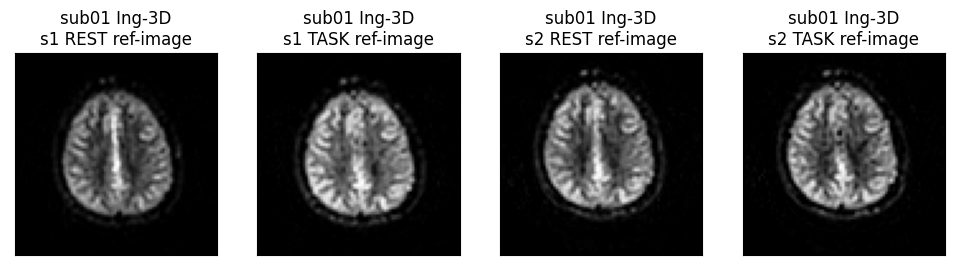

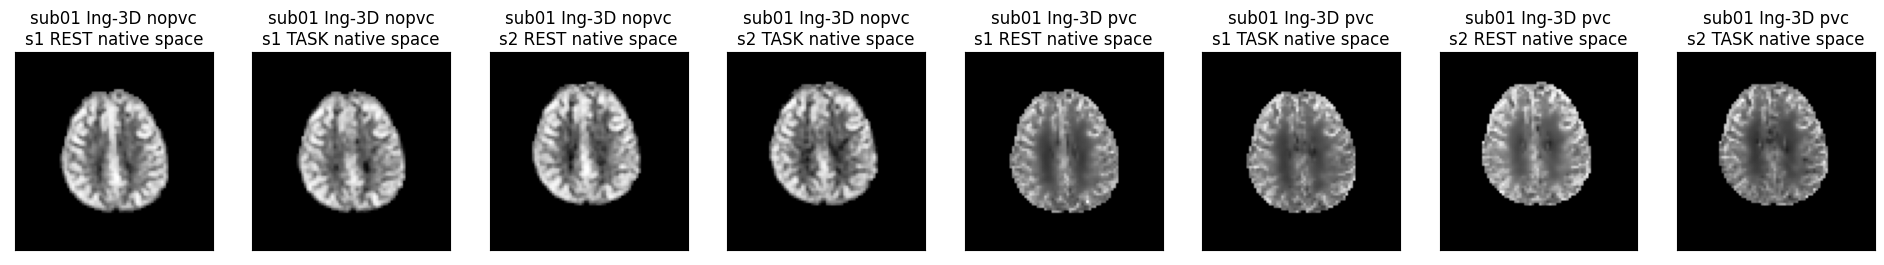

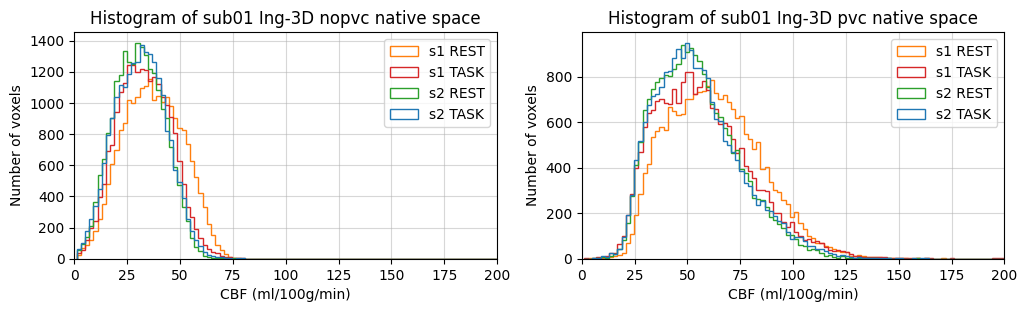

In [29]:
visualise_byprotocol(subno=[1],protocol='Ing-3D',space='native',hist=True,refon=True)

In [ ]:
def visualise_bysubject(subno,protocol='all',space='all',hist=True):

    figure = {}
    colors = ['tab:blue','tab:orange','tab:red','tab:green']
    if protocol=='all': protocol = ['GE-3D','GE-eASL','Ing-2D','Ing-3D']
    if space=='all': space=['native','struct','std']
    i=0
    for protocol_counter in protocol:
        
        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/sub{:02d}'.format(subno)
        ax = {}

        if protocol_counter=='GE-3D':
            figure[i] = plt.figure(figsize=[12,3],dpi=100) 
            figure[i+1] = plt.figure(figsize=[6,3],dpi=100)
            j=0
            if hist: ax_hist = figure[i+1].add_subplot()
            for session in ['s1','s2']:
                for state in ['REST','TASK']:
                    ax[j] = figure[i].add_subplot(1,4,j+1)
                    cbf = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed.nii.gz').get_fdata()
                    mask = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed_mask.nii.gz').get_fdata()
                    ax[j].imshow(cbf[:,:,round(cbf.shape[2]/2)],cmap='Greys_r')
                    ax[j].xaxis.set_visible(False)
                    ax[j].yaxis.set_visible(False)
                    ax[j].set_title('sub{:02d}'.format(subno)+' '+protocol_counter+'\n'+session+' '+state+' native space')
                    if hist: ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,histtype='step',label=session+' '+state,color=colors[j])
                    j+=1
            if hist: ax_hist.legend()
            if hist: ax_hist.grid(alpha=0.5)
            if hist: ax_hist.set_xlabel('CBF (ml/100g/min)')
            if hist: ax_hist.set_ylabel('Number of voxels')
            if hist: ax_hist.set_title('Histogram of sub{:02d}'.format(subno)+' '+protocol_counter+' native space')

            i+=2

        else:

            ax_hist = {}
            if protocol_counter=='GE-eASL':
                scanner='ge'; type='eASL'
            elif protocol_counter=='Ing-2D':
                scanner='ing'; type='2D'
            elif protocol_counter=='Ing-3D':
                scanner='ing'; type='3D'
            else:
                ValueError('Protocol name does not exist.')
            struct_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/T1_biascorr_brain_mask.nii.gz').get_fdata()
            std_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/MNI152_T1_2mm_brain_mask_dil1.nii.gz').get_fdata()
            for space_counter in space:
                
                figure[i] = plt.figure(figsize=[24,3],dpi=100) 
                figure[i+1] = plt.figure(figsize=[12,3],dpi=100)
                j=0
                for pvc in ['nopvc','pvc']:
                    if hist: ax_hist[j//4] = figure[i+1].add_subplot(1,2,j//4+1)
                    for session in ['s1','s2']:
                        for state in ['REST','TASK']:
                            ax[j] = figure[i].add_subplot(1,8,j+1)
                            if pvc=='nopvc':
                                cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space_counter+'_space/perfusion_calib.nii.gz').get_fdata()
                            if pvc=='pvc':
                                cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space_counter+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
                            if space_counter=='native':
                                mask = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space_counter+'_space/mask.nii.gz').get_fdata()
                            elif space_counter=='struct':
                                mask = struct_mask
                            elif space_counter=='std':
                                mask = std_mask
                            ax[j].imshow(cbf[:,:,round(cbf.shape[2]/2)],cmap='Greys_r')
                            ax[j].xaxis.set_visible(False)
                            ax[j].yaxis.set_visible(False)
                            ax[j].set_title('sub{:02d}'.format(subno)+' '+protocol_counter+' '+pvc+'\n'+session+' '+state+' '+space_counter+' space')
                            if hist: ax_hist[j//4].hist(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200),histtype='step',label=session+' '+state,color=colors[j%4])
                            j+=1
                    if hist: ax_hist[(j-1)//4].legend()
                    if hist: ax_hist[(j-1)//4].grid(alpha=0.5)
                    if hist: ax_hist[(j-1)//4].set_xlim([0,200])
                    if hist: ax_hist[(j-1)//4].set_xlabel('CBF (ml/100g/min)')
                    if hist: ax_hist[(j-1)//4].set_ylabel('Number of voxels')
                    if hist: ax_hist[(j-1)//4].set_title('Histogram of sub{:02d}'.format(subno)+' '+protocol_counter+' '+pvc+' '+space_counter+' space')
                
        i+=2

    return None

visualise_bysubject(subno=1,protocol='all',space='all',hist=True)